In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine=engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
query_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_recent_date

('2017-08-23')

In [12]:
last_date = dt.datetime(2016, 8, 22)

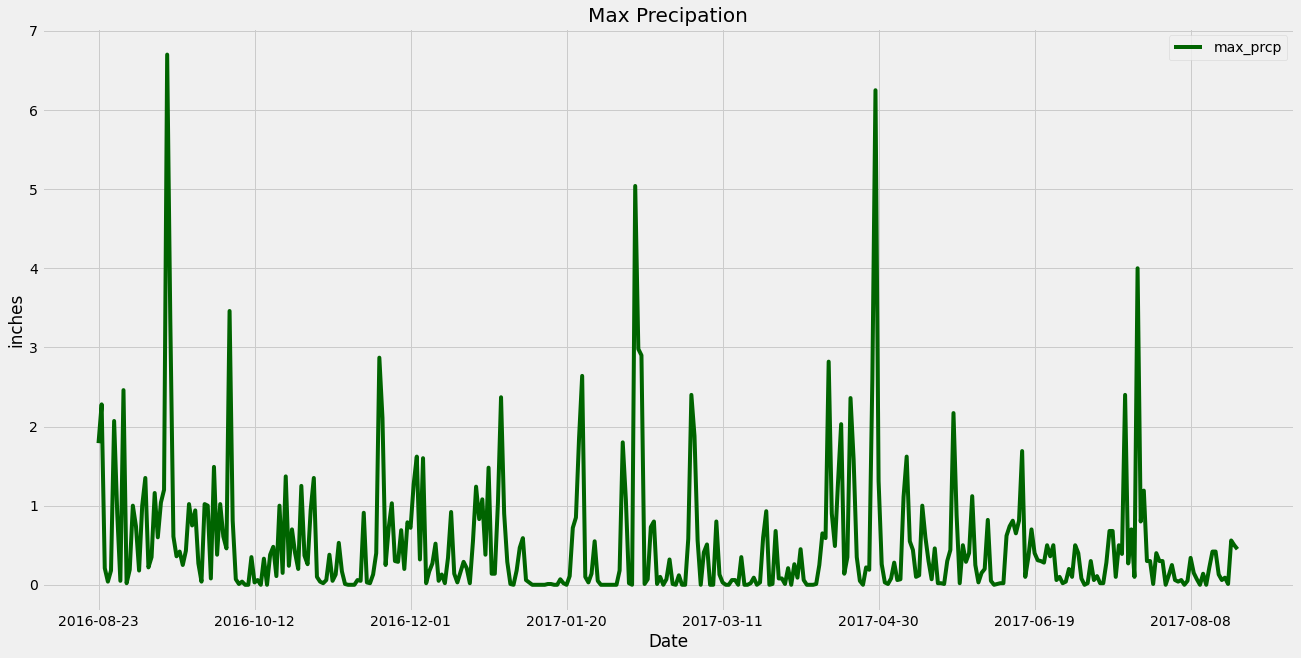

In [18]:
max_precipation_data = [Measurement.date, func.max(Measurement.prcp)]

# Create a query that collects only the date and precipation for last year data
max_precipation = session.query(*max_precipation_data).\
    filter(Measurement.date > last_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Create a DataFrame and sort by date
max_precipation_df = pd.DataFrame(max_precipation, columns=['date', 'max_prcp'])
max_precipation_df.set_index('date', inplace=True)
max_precipation_df

# Plotting the results by using dataframe plot method
max_precipation_df.plot(figsize = [20,10], color ="darkgreen")

plt.title('Max Precipation', fontsize=20)
plt.xlabel('Date')
plt.ylabel('inches')

plt.savefig("../Surfsup/Maximum precipation.png", dpi =300, bbox_inches='tight')


plt.show()

In [142]:
# Use Pandas to calcualte the summary statistics for the precipitation data
max_precipation_df.describe()


,max_prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


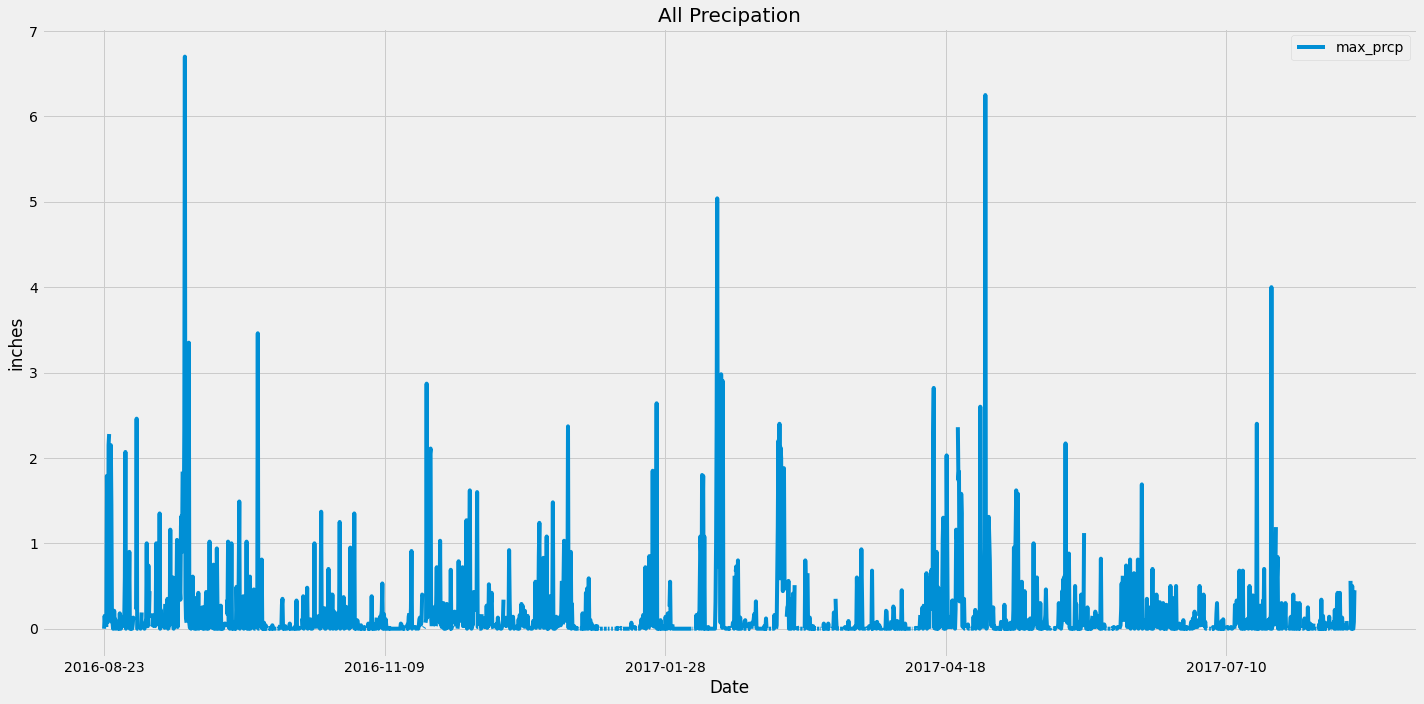

In [19]:
all_precipation_data = [Measurement.date, Measurement.prcp]

all_precipation = session.query(*all_precipation_data).\
    filter(Measurement.date > last_date).\
    order_by(Measurement.date).all()

all_precipation_df = pd.DataFrame(all_precipation, columns=['date', 'max_prcp'])
all_precipation_df.set_index('date', inplace=True)

all_precipation_df.plot(figsize = [20,10])

plt.title('All Precipation', fontsize=20)
plt.xlabel('Date')
plt.ylabel('inches')

plt.tight_layout()


plt.savefig("../Surfsup/all precipation.png", dpi =300, bbox_inches='tight')

plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Summary stats for all precpitation measurements on each date
all_precipation_df.describe()

,max_prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
from sqlalchemy import desc

In [22]:
# Design a query to calculate the total number stations in the dataset
total_station_count = session.query(Station).distinct().count()
print(f"There are a total of {total_station_count} stations.")

There are a total of 9 stations.


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = [Measurement.station, func.count(Measurement.station)]

station_counts = session.query(*station_activity).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_counts[0][0]

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()


print(f'The lowest temp is {lowest_temp} for station {most_active_station}.')
print(f'The highest temp is {highest_temp} for station {most_active_station}.')
print(f'The average temp is {average_temp} for station {most_active_station}.')

The lowest temp is 54.0 for station USC00519281.
The highest temp is 85.0 for station USC00519281.
The average temp is 71.66378066378067 for station USC00519281.


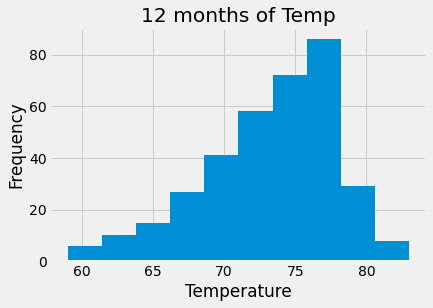

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = [Measurement.date, Measurement.tobs]

temp_at_most_active_station = session.query(*tobs_data).\
    filter(Measurement.date > last_date).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date).all()

# Create a DataFrame
temp_at_most_active_station_df = pd.DataFrame(temp_at_most_active_station)



# Construct a histogram
temp_at_most_active_station_df['tobs'].hist()

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('12 months of Temp')


plt.savefig("../Surfsup/12 months of Temp.png", dpi =300, bbox_inches='tight')

# Display the histogram
plt.show()


In [26]:
print(temp_at_most_active_station_df)

           date  tobs
0    2016-08-23  77.0
1    2016-08-24  77.0
2    2016-08-25  80.0
3    2016-08-26  80.0
4    2016-08-27  75.0
..          ...   ...
347  2017-08-14  77.0
348  2017-08-15  77.0
349  2017-08-16  76.0
350  2017-08-17  76.0
351  2017-08-18  79.0

[352 rows x 2 columns]


# Close session

In [151]:
# Close Session
session.close()